<a href="https://colab.research.google.com/github/Asaxena-2120/Gradebook/blob/main/Gradebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradebook Code Test Notebook**

In [ ]:
#import test dataset from google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('TempData').sheet1
logo="""

   ____     ____        _      ____  U _____ u   ____     U  ___ u   U  ___ u   _  __    
U /"___|uU |  _"\ u U  /"\  u |  _"\ \| ___"|/U | __")u    \/"_ \/    \/"_ \/  |"|/ /    
\| |  _ / \| |_) |/  \/ _ \/ /| | | | |  _|"   \|  _ \/    | | | |    | | | |  | ' /     
 | |_| |   |  _ <    / ___ \ U| |_| |\| |___    | |_) |.-,_| |_| |.-,_| |_| |U/| . \\u   
  \____|   |_| \_\  /_/   \_\ |____/ u|_____|   |____/  \_)-\___/  \_)-\___/   |_|\_\    
  _)(|_    //   \\_  \\    >>  |||_   <<   >>  _|| \\_       \\         \\   ,-,>> \\,-. 
 (__)__)  (__)  (__)(__)  (__)(__)_) (__) (__)(__) (__)     (__)       (__)   \.)   (_/  
"""

In [ ]:
print(logo)



   ____     ____        _      ____  U _____ u   ____     U  ___ u   U  ___ u   _  __    
U /"___|uU |  _"\ u U  /"\  u |  _"\ \| ___"|/U | __")u    \/"_ \/    \/"_ \/  |"|/ /    
\| |  _ / \| |_) |/  \/ _ \/ /| | | | |  _|"   \|  _ \/    | | | |    | | | |  | ' /     
 | |_| |   |  _ <    / ___ \ U| |_| |\| |___    | |_) |.-,_| |_| |.-,_| |_| |U/| . \u   
  \____|   |_| \_\  /_/   \_\ |____/ u|_____|   |____/  \_)-\___/  \_)-\___/   |_|\_\    
  _)(|_    //   \_  \    >>  |||_   <<   >>  _|| \_       \         \   ,-,>> \,-. 
 (__)__)  (__)  (__)(__)  (__)(__)_) (__) (__)(__) (__)     (__)       (__)   \.)   (_/  



In [ ]:
#import required packages
import pandas as pd

#Load Dataframe into dataframe object
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows[1:])
df.columns = rows[0]

df

,Student ID,First Name,Last Name,Email Address,TEST1,TEST2,TEST3,FINAL
0,1001,Kiley,Caldarera,Kiley.Calh@edu.com,85,69,86,74
1,1002,Rosio,Cork,Rosio.Cork@edu.com,65,70,73,86
2,1003,Ilene,Eroman,Ilene.Erom@edu.com,76,81,99,86
3,1004,Jesusa,Shin,Jesusa.Shin@edu.com,90,95,68,69
4,1005,Jose,Stockham,Jose.Stoc@edu.com,73,73,86,77


In [ ]:
#Modify datafram to containt pertainant values
numeric_columns = ["TEST1", "TEST2", "TEST3", "FINAL"]

df_mod = df

df_mod[numeric_columns] = df_mod[numeric_columns].apply(pd.to_numeric)

df_mod = df_mod.drop(["Student ID","First Name", "Last Name","Email Address"], axis = 1)

df_mod

,TEST1,TEST2,TEST3,FINAL
0,85,69,86,74
1,65,70,73,86
2,76,81,99,86
3,90,95,68,69
4,73,73,86,77


In [ ]:
#Ignore str columns
#change datatypes to int for columns TEST1,TESt2

In [ ]:
#Statistics by test

#select test
testname = 'TEST1'

#convert values to float
df[testname] = df[testname].astype(float)

df_mean = df[testname].mean()
df_mean


77.8

In [ ]:
#Statistics by student

#calculate all average by row
df_mod['Student Average'] = df_mod.mean(axis = 1)

#Add student averages back to the main dataframe
df['Student Average'] = df_mod['Student Average']

df

,Student ID,First Name,Last Name,Email Address,TEST1,TEST2,TEST3,FINAL,Student Average
0,1001,Kiley,Caldarera,Kiley.Calh@edu.com,85.0,69,86,74,78.50
1,1002,Rosio,Cork,Rosio.Cork@edu.com,65.0,70,73,86,73.50
2,1003,Ilene,Eroman,Ilene.Erom@edu.com,76.0,81,99,86,85.50
3,1004,Jesusa,Shin,Jesusa.Shin@edu.com,90.0,95,68,69,80.50
4,1005,Jose,Stockham,Jose.Stoc@edu.com,73.0,73,86,77,77.25


In [ ]:
#df.append({'TEST1':50,'TEST2':60,'TEST3':70,'FINAL':80}, ignore_index=True)

# create an Empty DataFrame object
df_temp = pd.DataFrame()

#converting df_mod means series to a list
class_avg = (df_mod.mean()).tolist()

#Appending df_temp to df, where df_temp is a temporary dataframe to store the mappings of means to the tests
for i in range(len(df_mod.columns)):
  df_temp[df_mod.columns[i]] =[class_avg[i]]
df = df.append(df_temp,ignore_index = True)
df


,Student ID,First Name,Last Name,Email Address,TEST1,TEST2,TEST3,FINAL,Student Average
0,1001,Kiley,Caldarera,Kiley.Calh@edu.com,85.0,69.0,86.0,74.0,78.50
1,1002,Rosio,Cork,Rosio.Cork@edu.com,65.0,70.0,73.0,86.0,73.50
2,1003,Ilene,Eroman,Ilene.Erom@edu.com,76.0,81.0,99.0,86.0,85.50
3,1004,Jesusa,Shin,Jesusa.Shin@edu.com,90.0,95.0,68.0,69.0,80.50
4,1005,Jose,Stockham,Jose.Stoc@edu.com,73.0,73.0,86.0,77.0,77.25
5,NaN,NaN,NaN,NaN,77.8,77.6,82.4,78.4,79.05


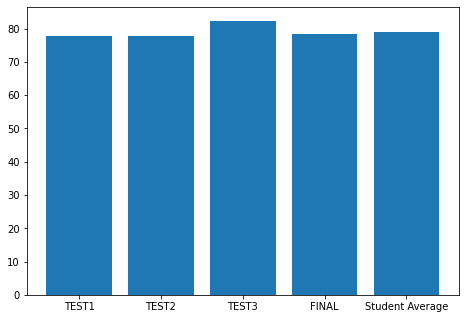

In [ ]:
#Class avg bar graph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
means = df_mod.columns
tests = class_avg
ax.bar(means,tests)
plt.show()


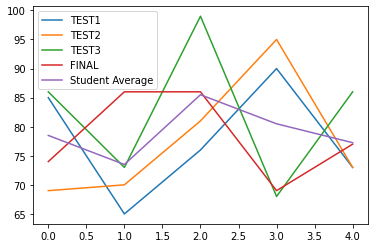

In [ ]:
#Class avg line graph
df_mod.plot()